#  Futures
Before discussing the basic concepts and formulas related to futures, let's review
the concept of continuously compounded interest rates. In Chapter  Time Value of
Money, we learned that the following formula could be applied to estimate the future
value of a given present value:
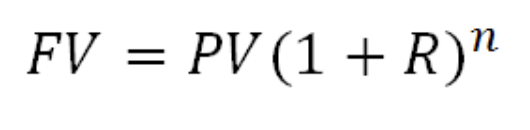

Here, FV is the future value, PV is the present value, R is the effective period rate and
n is the number of periods. For example, assume that the Annual Percentage Rate
(APR) is 8%, compounded semiannually. If we deposit $100 today, what is its future
value in two years? The following code shows the result:

In [1]:
import scipy as ps
pv=100
APR=0.08
rate=APR/2.0
n=2
nper=n*2
fv=ps.fv(rate,nper,0,pv)
print(fv)

-116.98585600000003


For a futures contract, let's use the preceding example of an importer in the US who
is going to pay £10 million in three months. Usually, there are two ways to present
an exchange rate: value of the first currency per unit of the second currency, and the
opposite. Let's treat US as domestic and England as foreign, and the exchange rate is
quoted in dollars per pound. Assume that today the exchange rate is £1 = 1.25 USD,
the domestic interest rate is 1% and the foreign interest rate (in England) is 2%. The
following codes show how much we need today in terms of pounds and US dollars:

In [2]:
import scipy as sp
amount=5
r_foreign=0.02
T=3./12.
exchangeRateToday=1.25
poundToday=5*sp.exp(-r_foreign*T)
print("Pound needed today=", poundToday)
usToday=exchangeRateToday*poundToday
print("US dollar needed today", usToday)

Pound needed today= 4.975062395963412
US dollar needed today 6.218827994954265


The result shows that we would need £4.975 million today to satisfy the payment
of £5 million in three months, since we could deposit £4.975 million in a bank to
earn extra interest (at 1%). If the importer has no pounds, they could spend $6.2188
million US dollars to purchase the amount of pounds today. Alternatively, the
importer could long a future contract (or a few future contracts) to purchase pounds
in three months with a fixed exchange rate determined today. The forward rate
(future exchange rate) is given here:
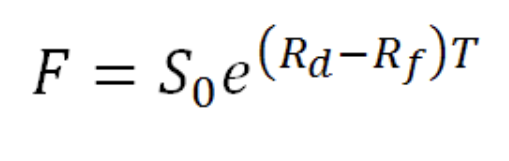

Here, F is the future price (in this case future exchange rate determined today), S0
is the spot price (in this case today's exchange rate), Rd is the domestic risk-free
rate compounded continuously, Rf is the foreign deposit rate compounded
continuously and T is the maturity in years. The following Python program shows
the future price today:

In [3]:
import scipy as sp
def futuresExchangeRate(s0,rateDomestic,rateForeign,T):
    futureEx=s0*sp.exp((rateDomestic-rateForeign)*T)
    return futureEx

s0=1.25
rHome=0.01
rForeigh=0.02
T=3./12.
#
futures=futuresExchangeRate(s0,rHome,rForeigh,T)
print("futures=",futures)

futures= 1.246878902996825


Based on the result, the exchange rate in three months should be 1.2468789 US
dollars per pound. In other words, US dollars should have depreciated against the
British pound. The reason is based on the two interest rates. Here is the logic based
on the no arbitrage principle. Assume that we have 1.25 USD today. We have two
choices: deposit in a US bank to enjoy 2%, or exchange it for 1 pound and deposit
it in a foreign bank, enjoying 1%. Assume further, if the future exchange rate is not
1.246879, we would have an arbitrate opportunity. Just assume that the futures price
(for exchange rate) is 1.26 indicating that the pound is overvalued relative to the
US dollar. An arbitrator would buy low and sell high, that is, short futures. Assume
that we have one pound obligation in three months. Here is the arbitrage strategy:
borrow 1.25 (USD) and sell one pound in three months with a future price of $1.26.
At the end of three months, here is the profit of our arbitrage:

In [4]:
import scipy as sp
obligationForeign=1.0 # how much to pay in 3 months
f=1.26 # future price
s0=1.25 # today's exchange rate
rHome=0.01
rForeign=0.02
T=3./12.
todayObligationForeign=obligationForeign*sp.exp(-rForeign*T)
usBorrow=todayObligationForeign*s0
costDollarBorrow=usBorrow*sp.exp(rHome*T)
profit=f*obligationForeign-costDollarBorrow
print("profit in USD =", profit)

profit in USD = 0.013121097003174764


The profit is 0.15 USD. If the future price is lower than 1.246878902996825, an
arbitrager would take an opposite position, that is, long a future contract. For stocks
with no dividend payment before the expiry date, we have the following future price:
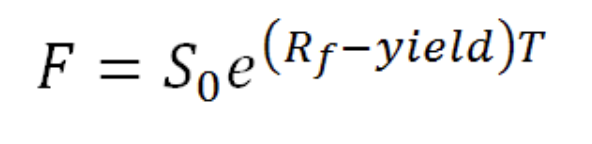

Here F is the futures price, S0 is the current stock price, Rf is the continuously
compounded risk-free rate, yield is the dividend yield continuously compounded.
For known discrete dividends before a maturity date, we have the following formula:
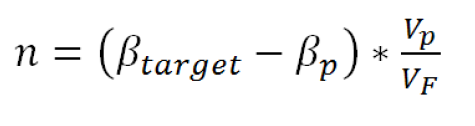

# Payoff  for call and put options
An option gives its buyer the right to buy (call option) or sell (put option) something
in the future to the option seller at a predetermined price (exercise price). For
example, if we buy a European call option to acquire a stock for X dollars, such as
30, at the end of three months our payoff on maturity day will be the one calculated
using the following formula:
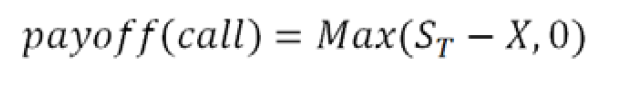

Here,St is the stock price at the maturity date (T), the exercise price is X (X=30
in this case). Assume that three months later the stock price is 25. We would not
exercise our call option to pay 30 in exchange for the stock since we could buy the
same stock with 25 in the open market. On the other hand, if the stock price is 40,
we will exercise our right to reap a payoff of 10, that is, buy the stock at 30 and sell
it at 40. The following program presents the payoff function for a call:

In [5]:
def payoff_call(sT,x):
    return (sT-x+abs(sT-x))/2

To create a graphic presentation, we have the following codes:

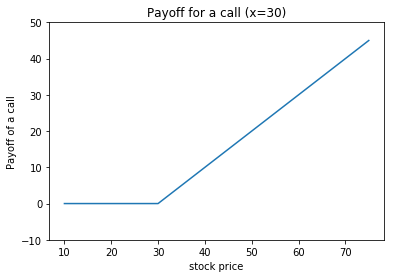

In [8]:
import numpy as np
import matplotlib.pyplot as plt
s = np.arange(10,80,5)
x=30
payoff=(abs(s-x)+s-x)/2
plt.ylim(-10,50)
plt.plot(s,payoff)
plt.title("Payoff for a call (x=30)")
plt.xlabel("stock price")
plt.ylabel("Payoff of a call")
plt.show()

The payoff for a call option seller is the opposite of its buyer. It is important to
remember that this is a zero-sum game: you win, I lose. For example, an investor
sold three call options with an exercise price of 10. When the stock price is 15 on
the maturity, the option buyer's payoff is 15, while the total loss to the option writer
is 15 as well. If the call premium (option price) is c, the profit/loss function for a
call option buyer is the difference between her payoff and her initial investment (c).
Obviously, the timing of cash-flows of paying an option premium upfront and its
payoff at maturity day is different. Here, we ignore the time value of money since
maturities are usually quite short.
For a call option buyer:
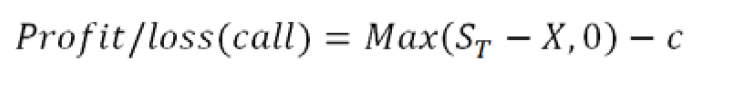

For a call option seller:
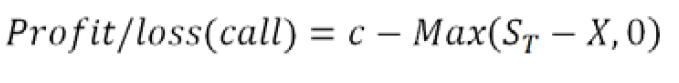

The following graph shows the profit/loss functions for call option buyer and seller:

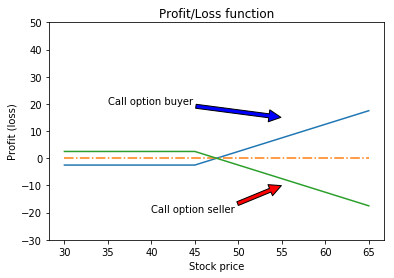

In [9]:
import scipy as sp
import matplotlib.pyplot as plt
s = sp.arange(30,70,5)
x=45;c=2.5
y=(abs(s-x)+s-x)/2 -c
y2=sp.zeros(len(s))
plt.ylim(-30,50)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.title("Profit/Loss function")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Call option buyer', xy=(55,15), xytext=(35,20),
arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Call option seller', xy=(55,-10), xytext=(40,-20),
arrowprops=dict(facecolor='red',shrink=0.01),)
plt.show()

A put option gives its buyer a right to sell a security (commodity) to the put option
buyer in the future at a predetermined price, X. Here is its payoff function:
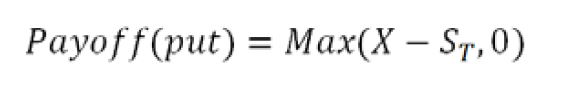

Here, ST is the stock price at maturity and X is the exercise price (strike price). For a
put option buyer, the profit/loss function is given here:
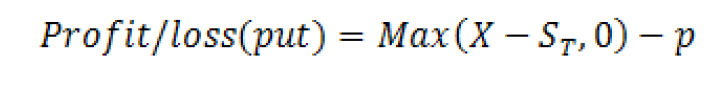

The related program and graph for the profit and loss functions for a put option
buyer and a seller are shown here:

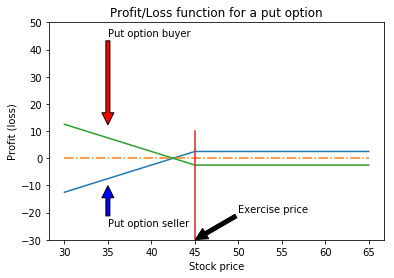

In [15]:
import scipy as sp
import matplotlib.pyplot as plt
s = sp.arange(30,70,5)
x=45;p=2;c=2.5
y=c-(abs(x-s)+x-s)/2
y2=sp.zeros(len(s))
x3=[x, x]
y3=[-30,10]
plt.ylim(-30,50)
plt.plot(s,y)
plt.plot(s,y2,'-.')
plt.plot(s,-y)
plt.plot(x3,y3)
plt.title("Profit/Loss function for a put option")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Put option buyer', xy=(35,12), xytext=(35,45), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Put option seller', xy=(35,-10), xytext=(35,-25), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Exercise price', xy=(45,-30), xytext=(50,-20), arrowprops=dict(facecolor='black',shrink=0.01),)
plt.show()

# European and American options
A European option can be exercised only on maturity day, while an American option
can be exercised any time before or on its maturity day. Since an American option
could be held until it matures, its price (option premium) should be higher than or
equal to its European counterpart:Ca>Ce; Pa>Pe
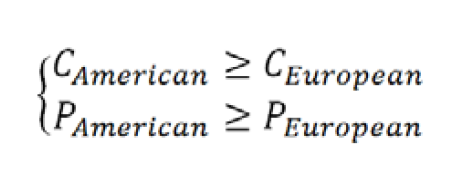

An import difference is that for a European option, we have a close form solution,
that is, the Black-Scholes-Merton option model. However, we don't have a closeform
solution for an American option. Fortunately, we have several ways to price
an American option. Later in the chapter, we show how to use the Binomial-tree
method, also called the CRR method, to price an American option.

We know that for each business contract, we have two sides: buyer versus seller.
This is true for an option contract as well. A call buyer will pay upfront (cash output)
to acquire a right. Since this is a zero-sum game, a call option seller would enjoy an
upfront cash inflow and assumes an obligation.

# Black-Scholesoption model
The Black-Scholes-Merton option model is a closed-form solution to price a
European option on a stock which does not pay any dividends before its maturity
date. If we use S0or the price today, X for the exercise price, r for the continuously
compounded risk-free rate, T for the maturity in years, sigma for the volatility of the
stock, the closed-form formulae for a European call (c) and put (p) are:
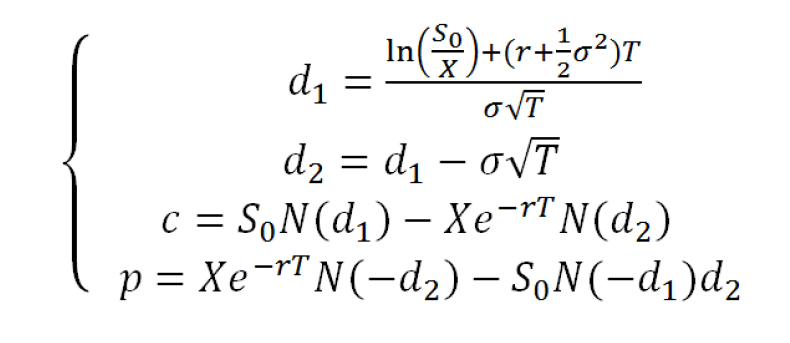

Here, N() is the cumulative standard normal distribution. The following Python
codes represent the preceding equations to evaluate a European call:

In [18]:
from scipy import log,exp,sqrt,stats
def bs_call(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)

In the preceding program, the stats.norm.cdf() is the cumulative normal
distribution, that is, N() in the Black-Scholes-Merton option model. The current stock
price is 40, the strike price is 42, the time to maturity is six months, the risk-free
rate is 1.5% compounded continuously, and the volatility of the underlying stock is
20% (compounded continuously). Based on the preceding codes, the European call is
worth 1.56:

In [20]:
c=bs_call(40.,42.,0.5,0.015,0.2)
round(c,2)

1.56

In [23]:
def bs_call(S,X,T,rf,sigma):
    from scipy import log,exp,sqrt,stats
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-rf*T)*stats.norm.cdf(d2)
def binomial_grid(n):
    import networkx as nx
    import matplotlib.pyplot as plt
    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={} #dictionary with nodes position
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    nx.draw(G,pos=posG)
def delta_call(S,X,T,rf,sigma):
    from scipy import log,exp,sqrt,stats
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    return(stats.norm.cdf(d1))
def delta_put(S,X,T,rf,sigma):
    from scipy import log,exp,sqrt,stats
    d1=(log(S/X)+(rf+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    return(stats.norm.cdf(d1)-1)

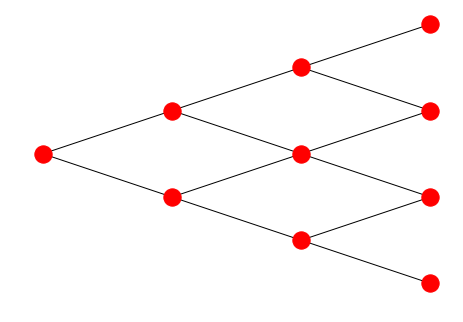

In [26]:
binomial_grid(3)

In the following table, we summarize several commonly used trading strategies
involving various types of options:
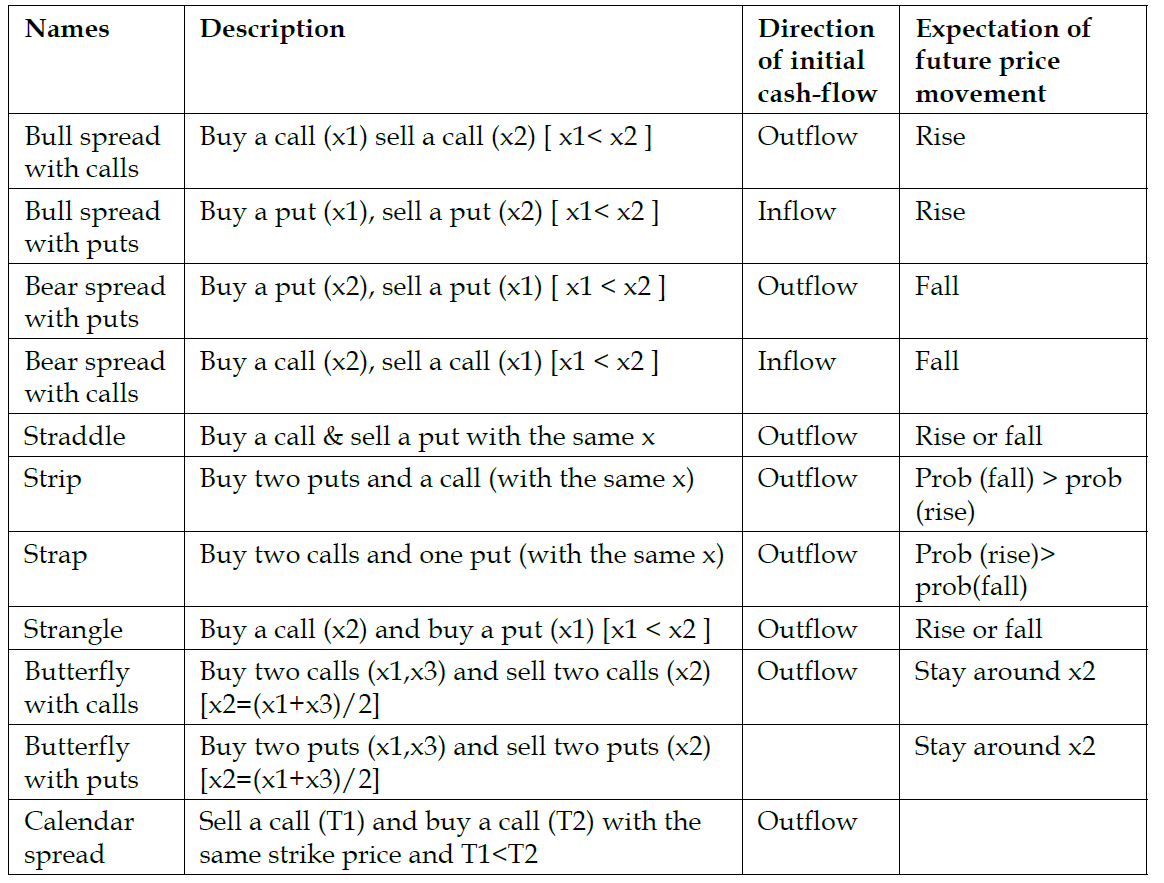

# long a stock and short a call
Assume that we purchase 100 shares of stock A, with a price of 10 each. Thus, the
total cost is 1,000. If at the same time we write a call contract, one contract is worth
100 shares, at a price of 20. Thus, our total cost will be reduced by 20. Assume
further that the exercise price is 12. The graphic presentation of our profit and loss
function is given here:

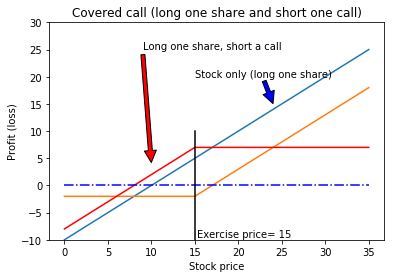

In [27]:
import matplotlib.pyplot as plt
import numpy as np
sT = np.arange(0,40,5)
k=15;s0=10;c=2
y0=np.zeros(len(sT))
y1=sT-s0 # stock only
y2=(abs(sT-k)+sT-k)/2-c # long a call
y3=y1-y2 # covered-call
plt.ylim(-10,30)
plt.plot(sT,y1)
plt.plot(sT,y2)
plt.plot(sT,y3,'red')
plt.plot(sT,y0,'b-.')
plt.plot([k,k],[-10,10],'black')
plt.title('Covered call (long one share and short one call)')
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Stock only (long one share)', xy=(24,15),xytext=(15,20),
arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('Long one share, short a call', xy=(10,4), xytext=(9,25),
arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Exercise price= '+str(k), xy=(k+0.2,-10+0.5))
plt.show()

# Straddle
buy a call and a put with the same exercise prices
Let's look at the simplest scenario. A firm faces an uncertain event next month. The
issue is that we are not sure about its direction, that is, a good event or bad one. To
take advantage of such an opportunity, we could u a call and buy a put with the
same exercise prices. This means that we will benefit either way: the stock moves up
or down. Assume further that the exercise price is $30. The payoff of such a strategy
is given here:

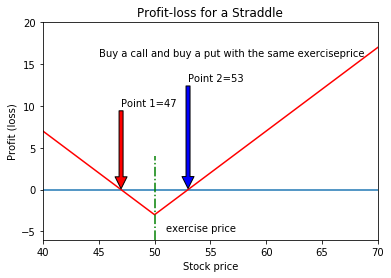

In [34]:
import matplotlib.pyplot as plt
import numpy as np
sT = np.arange(30,80,5)
x=50; c=2; p=1
straddle=(abs(sT-x)+sT-x)/2-c + (abs(x-sT)+x-sT)/2-p
y0=np.zeros(len(sT))
plt.ylim(-6,20)
plt.xlim(40,70)
plt.plot(sT,y0)
plt.plot(sT,straddle,'r')
plt.plot([x,x],[-6,4],'g-.')
plt.title("Profit-loss for a Straddle")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Point 1='+str(x-c-p), xy=(x-p-c,0), xytext=(x-p-c,10),
arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Point 2='+str(x+c+p), xy=(x+p+c,0), xytext=(x+p+c,13),
arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('exercise price', xy=(x+1,-5))
plt.annotate('Buy a call and buy a put with the same exerciseprice',xy=(45,16))
plt.show()

# Butterfly with calls
When buying two calls with the exercises price of x1 and x3 and selling two calls
with the exercise price of x2, where x2=(x1+x2)/2, with the same maturity for the
same stock, we call it a butterfly. Its profit-loss function is shown here:


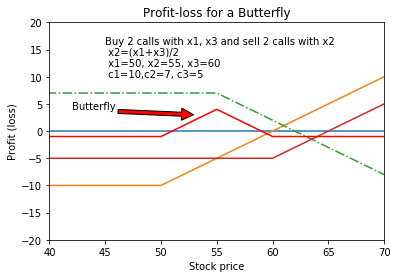

In [36]:
import matplotlib.pyplot as plt
import numpy as np
sT = np.arange(30,80,5)
x1=50; c1=10
x2=55; c2=7
x3=60; c3=5
y1=(abs(sT-x1)+sT-x1)/2-c1
y2=(abs(sT-x2)+sT-x2)/2-c2
y3=(abs(sT-x3)+sT-x3)/2-c3
butter_fly=y1+y3-2*y2
y0=np.zeros(len(sT))
plt.ylim(-20,20)
plt.xlim(40,70)
plt.plot(sT,y0)
plt.plot(sT,y1)
plt.plot(sT,-y2,'-.')
plt.plot(sT,y3)
plt.plot(sT,butter_fly,'r')
plt.title("Profit-loss for a Butterfly")
plt.xlabel('Stock price')
plt.ylabel('Profit (loss)')
plt.annotate('Butterfly', xy=(53,3), xytext=(42,4), arrowprops=dict(facecolor='red',shrink=0.01),)
plt.annotate('Buy 2 calls with x1, x3 and sell 2 calls with x2',
xy=(45,16))
plt.annotate(' x2=(x1+x3)/2', xy=(45,14))
plt.annotate(' x1=50, x2=55, x3=60',xy=(45,12))
plt.annotate(' c1=10,c2=7, c3=5', xy=(45,10))
plt.show()

# The relationship between volatility and option price
When the volatility of an underlying stock increases, both its call and put values
increase. The logic is that when a stock becomes more volatile, we have a better
chance to observe extreme values, that is, we have a better chance to exercise our
option. The following Python program shows this relationship:

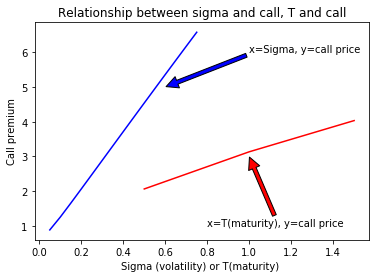

In [42]:
import numpy as np

import matplotlib.pyplot as plt
s0=30
T0=0.5
sigma0=0.2
r0=0.05
x0=30
sigma=np.arange(0.05,0.8,0.05)
T=np.arange(0.5,2.0,0.5)
call_0=bs_call(s0,x0,T0,r0,sigma0)
call_sigma=bs_call(s0,x0,T0,r0,sigma)
call_T=bs_call(s0,x0,T,r0,sigma0)
plt.title("Relationship between sigma and call, T and call")
plt.plot(sigma,call_sigma,'b')
plt.plot(T,call_T,'r')
plt.annotate('x=Sigma, y=call price', xy=(0.6,5), xytext=(1,6), arrowprops=dict(facecolor='blue',shrink=0.01),)
plt.annotate('x=T(maturity), y=call price', xy=(1,3), xytext=(0.8,1),arrowprops=dict(facecolor='red',shrink=0.01),)
plt.ylabel("Call premium")
plt.xlabel("Sigma (volatility) or T(maturity) ")
plt.show()

# Greeks
Delta is defined as the derivative of the option to its underlying security price.
The delta of a call is defined here:
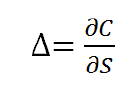

The delta of a European call on a non-dividend-paying stock is defined as:
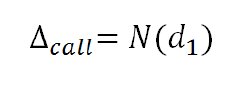

In [43]:
round(delta_call(40,40,1,0.1,0.2),4)

0.7257

The delta for a European put on a non-dividend-paying stock is:
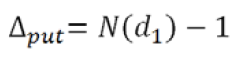

In [44]:
round(delta_put(40,40,1,0.1,0.2),4)

-0.2743

Gamma is the rate of change of delta with respect to price, as shown in this formula:
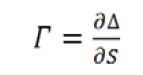

For a European call (or put), its gamma is shown here
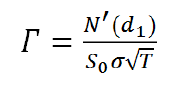

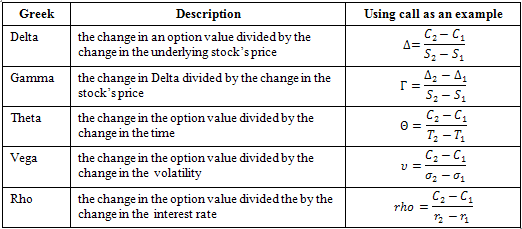

# Put-call parity 
Let's look at a call with an exercise price of $20, a maturity of three months and a
risk-free rate of 5%. The present value of this future $20 is given here:

In [45]:
20*exp(-0.05*3/12)

19.75155600987763

In three months, what will be the wealth of our portfolio which consists of a call
on the same stock plus 19.75 cash today? If the stock price is below 20, we don't
exercise the call and keep the cash. If the stock price is above 20, we use our cash of
20 to exercise our call option to own the stock. Thus, our portfolio value will be the
maximum of those two values: stock price in three months or 20, that is, max(s,20).

On the other hand, how about a portfolio with a stock plus a put option with an
exercise price of 20? If the stock price falls by 20, we exercise the put option and
get 20. If the stock price is above 20, we simply keep the stock. Thus, our portfolio
value will be the maximum of those two values: stock price in three months or 20,
that is, max(s,20).

Thus, for both portfolios we have the same terminal wealth of max(s,20). Based on the
no-arbitrage principle, the present values of those two portfolios should be equal. We
call this put-call parity:
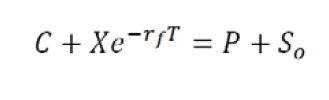

When the stock has known dividend payments before its maturity date, we have the
following equality:
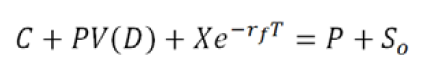

Here, D is the present value of all dividends before their maturity date (T). The
following Python program offers a graphic presentation of the put-call parity:

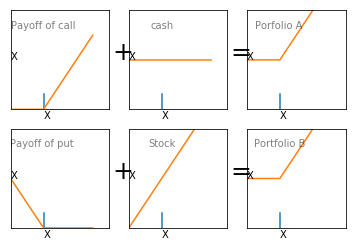

In [48]:
import pylab as pl
import numpy as np
x=10
sT=np.arange(0,30,5)
payoff_call=(abs(sT-x)+sT-x)/2
payoff_put=(abs(x-sT)+x-sT)/2
cash=np.zeros(len(sT))+x
def graph(text,text2=''):
    pl.xticks(())
    pl.yticks(())
    pl.xlim(0,30)
    pl.ylim(0,20)
    pl.plot([x,x],[0,3])
    pl.text(x,-2,"X");
    pl.text(0,x,"X")
    pl.text(x,x*1.7, text, ha='center', va='center',size=10, alpha=.5)
    pl.text(-5,10,text2,size=25)
pl.figure(figsize=(6, 4))
pl.subplot(2, 3, 1); graph('Payoff of call'); pl.plot(sT,payoff_call)
pl.subplot(2, 3, 2); graph('cash','+'); pl.plot(sT,cash)
pl.subplot(2, 3, 3); graph('Porfolio A ','=');
pl.plot(sT,cash+payoff_call)
pl.subplot(2, 3, 4); graph('Payoff of put '); pl.plot(sT,payoff_put)
pl.subplot(2, 3, 5); graph('Stock','+'); pl.plot(sT,sT)
pl.subplot(2, 3, 6); graph('Portfolio B','='); pl.plot(sT,sT+payoff_put)
pl.show()

The put-call ratio represents the perception of investors jointly towards the future. If
there is no obvious trend, that is, we expect a normal future, then the put-call ratio
should be close to one. On the other hand, if we expect a much brighter future, the
ratio should be lower than one.

# Binomial tree
The binomial tree method was proposed by Cox, Ross, and Robinstein in 1979.
Because of this, it is also called the CRR method. Based on the CRR method, we have
the following two-step approach. First, we draw a tree, such as the following onestep
tree. Assume that our current stock value is S. Then, there are two outcomes of
Su and Sd, where u>1 and d<1, see the following code:

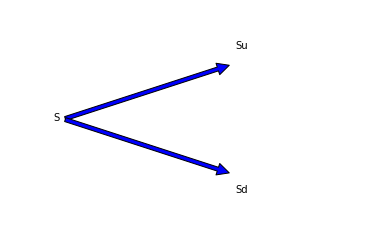

In [50]:
import matplotlib.pyplot as plt
plt.xlim(0,1)
plt.figtext(0.18,0.5,'S')
plt.figtext(0.6,0.5+0.25,'Su')
plt.figtext(0.6,0.5-0.25,'Sd')
plt.annotate('',xy=(0.6,0.5+0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.annotate('',xy=(0.6,0.5-0.25), xytext=(0.1,0.5), arrowprops=dict(facecolor='b',shrink=0.01))
plt.axis('off')
plt.show()

Obviously, the simplest tree is a one-step tree. Assume that today's price is $10, the
exercise price is $11, and a call option will mature in six months. In addition, assume
that we know that the price will have two outcomes: moving up (u=1.15) or moving
down (d=0.9). In other words, the final values are either $11 or $9. Based on such
information, we have the following graph showing the prices for such a one-step
binomial tree:
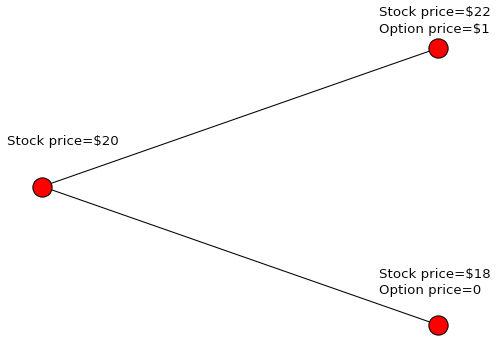

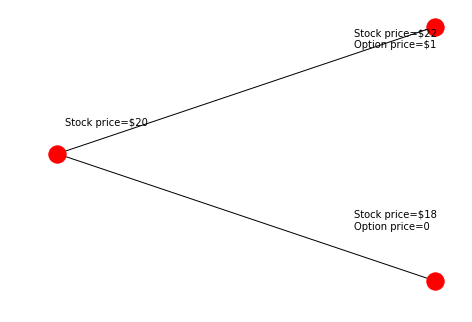

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
plt.figtext(0.08,0.6,"Stock price=$20")
plt.figtext(0.75,0.91,"Stock price=$22")
plt.figtext(0.75,0.87,"Option price=$1")
plt.figtext(0.75,0.28,"Stock price=$18")
plt.figtext(0.75,0.24,"Option price=0")
n=1
def binomial_grid(n):
    G=nx.Graph()
    for i in range(0,n+1):
        for j in range(1,i+2):
            if i<n:
                G.add_edge((i,j),(i+1,j))
                G.add_edge((i,j),(i+1,j+1))
    posG={}
    for node in G.nodes():
        posG[node]=(node[0],n+2+node[0]-2*node[1])
    nx.draw(G,pos=posG)
binomial_grid(n)
plt.show()

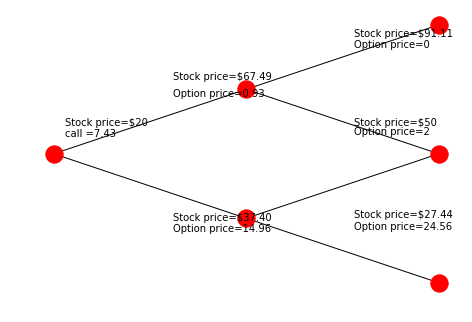

In [52]:
plt.figtext(0.08,0.6,"Stock price=$20")
plt.figtext(0.08,0.56,"call =7.43")
plt.figtext(0.33,0.76,"Stock price=$67.49")
plt.figtext(0.33,0.70,"Option price=0.93")
plt.figtext(0.33,0.27,"Stock price=$37.40")
plt.figtext(0.33,0.23,"Option price=14.96")
plt.figtext(0.75,0.91,"Stock price=$91.11")
plt.figtext(0.75,0.87,"Option price=0")
plt.figtext(0.75,0.6,"Stock price=$50")
plt.figtext(0.75,0.57,"Option price=2")
plt.figtext(0.75,0.28,"Stock price=$27.44")
plt.figtext(0.75,0.24,"Option price=24.56")
n=2
binomial_grid(n)

Now, we use the risk-neutral probability to discount each value one step backward.
The codes and the graph are given here:

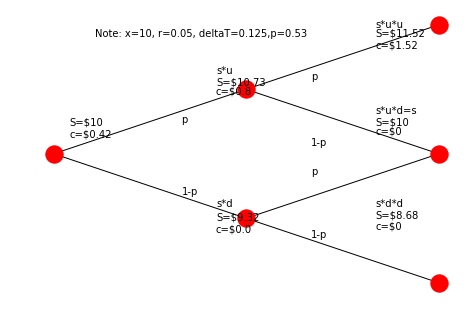

In [53]:
import scipy as sp
import matplotlib.pyplot as plt
s=10;x=10;r=0.05;sigma=0.2;T=3./12.;n=2;q=0 # q is dividend yield
deltaT=T/n # step
u=sp.exp(sigma*sp.sqrt(deltaT))
d=1/u
a=sp.exp((r-q)*deltaT)
p=(a-d)/(u-d)
s_dollar='S=$'
c_dollar='c=$'
p2=round(p,2)
plt.figtext(0.15,0.91,'Note: x='+str(x)+', r='+str(r)+', deltaT='+str(
deltaT)+',p='+str(p2))
plt.figtext(0.35,0.61,'p')
plt.figtext(0.65,0.76,'p')
plt.figtext(0.65,0.43,'p')
plt.figtext(0.35,0.36,'1-p')
plt.figtext(0.65,0.53,'1-p')
plt.figtext(0.65,0.21,'1-p')
# at level 2
su=round(s*u,2);
suu=round(s*u*u,2)
sd=round(s*d,2);
sdd=round(s*d*d,2)
sud=s
c_suu=round(max(suu-x,0),2)
c_s=round(max(s-x,0),2)
c_sdd=round(max(sdd-x,0),2)
plt.figtext(0.8,0.94,'s*u*u')
plt.figtext(0.8,0.91,s_dollar+str(suu))
plt.figtext(0.8,0.87,c_dollar+str(c_suu))
plt.figtext(0.8,0.6,s_dollar+str(sud))
plt.figtext(0.8,0.64,'s*u*d=s')
plt.figtext(0.8,0.57,c_dollar+str(c_s))
plt.figtext(0.8,0.32,'s*d*d')
plt.figtext(0.8,0.28,s_dollar+str(sdd))
plt.figtext(0.8,0.24,c_dollar+str(c_sdd))
# at level 1
c_01=round((p*c_suu+(1-p)*c_s)*sp.exp(-r*deltaT),2)
c_02=round((p*c_s+(1-p)*c_sdd)*sp.exp(-r*deltaT),2)
plt.figtext(0.43,0.78,'s*u')
plt.figtext(0.43,0.74,s_dollar+str(su))
plt.figtext(0.43,0.71,c_dollar+str(c_01))
plt.figtext(0.43,0.32,'s*d')
plt.figtext(0.43,0.27,s_dollar+str(sd))
plt.figtext(0.43,0.23,c_dollar+str(c_02))
# at level 0 (today)
c_00=round(p*sp.exp(-r*deltaT)*c_01+(1-p)*sp.exp(-r*deltaT)*c_02,2)
plt.figtext(0.09,0.6,s_dollar+str(s))
plt.figtext(0.09,0.56,c_dollar+str(c_00))
binomial_grid(n)

Here, we explain a few values shown in the preceding graph. At the highest node
(s*u*u), since the terminal stock price is 11.52 and the exercise price is 10, the call
value is 1.52 (11.52-10). Similarly, at node s*u*d=s the call value is 0 since 10-10=0.
For a call value of 0.8, we have the following verification:

In [54]:
(p*1.52+(1-p)*0)*exp(-r*deltaT)

0.7954831762391782

# Volatility smile 
Obviously, each stock should possess one value for its volatility. However, when
estimating implied volatility, different strike prices might offer us different implied
volatilities. More specifically, the implied volatility based on out-of-the-money
options, at-the-money options, and in-the-money options might be quite different.
Volatility smile is the shape going down then up with the exercise prices, while
the volatility skewness is downward or upward sloping. The key is that investors'
sentiments and the supply and demand relationship have a fundamental impact
on the volatility skewness.

# Hedging strategies
After selling a European call, we could hold shares of the same stock to hedge
our position. This is named a delta hedge. Since the delta is a function of
the underlying stock (S), to maintain an effective hedge we have to rebalance our
holding constantly. This is called dynamic hedging. The delta of a portfolio is the
weighted deltas of individual securities in the portfolio. Note that when we short a
security, its weight will be negative